In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({"font.size": 16})
default_cycle_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
print(default_cycle_colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [11]:
from cycler import cycler

In [12]:
import numpy as np

In [13]:
from scrinet.interfaces import lalutils

In [14]:
import lal
import lalsimulation as lalsim

In [15]:
import utils

In [75]:
# ignore some scipy warnings with quad
import warnings
warnings.filterwarnings('ignore')

# NRwaveform functions

In [16]:
import glob
import os

In [17]:
# get data
nrfiles_single_res = dict(
    q1="/Users/spx8sk/work/data/SXS_BBH_0180_Res4.h5",
    q2="/Users/spx8sk/work/data/SXS_BBH_0169_Res5.h5",
    q4="/Users/spx8sk/work/data/SXS_BBH_0167_Res5.h5",
    q5="/Users/spx8sk/work/data/SXS_BBH_0107_Res5.h5",
    q10="/Users/spx8sk/work/data/SXS_BBH_0303_Res5.h5",
    q18="/Users/spx8sk/work/git/stk/ml/waveforms/bob/q18a0a0c025_144-22-hybrid.h5",
)

In [18]:
def make_nr_dict():
    """
    makes a dictionary of paths to NR files
    with multiple resolutions
    """
    root_dir = "/Users/spx8sk/work/data/"
    nr_ids = dict(q1="180", q2="169", q4="167", q5="107", q10="303")

    nrfiles = {}

    for key, val in nr_ids.items():
        ps = glob.glob(os.path.join(root_dir, "*" + val + "*.h5"))

        nrfiles.update({key: {}})
        for p in ps:
            k = p.split("/")[-1].split(".h5")[0].split("_")[-1]
            nrfiles[key].update({k: p})

    return nrfiles

In [19]:
nrfiles = make_nr_dict()

In [20]:
nrfiles

{'q1': {'Res4': '/Users/spx8sk/work/data/SXS_BBH_0180_Res4.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0180_Res3.h5',
  'Res2': '/Users/spx8sk/work/data/SXS_BBH_0180_Res2.h5'},
 'q2': {'Res3': '/Users/spx8sk/work/data/SXS_BBH_0169_Res3.h5',
  'Res5': '/Users/spx8sk/work/data/SXS_BBH_0169_Res5.h5',
  'Res4': '/Users/spx8sk/work/data/SXS_BBH_0169_Res4.h5'},
 'q4': {'Res5': '/Users/spx8sk/work/data/SXS_BBH_0167_Res5.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0167_Res3.h5'},
 'q5': {'Res4': '/Users/spx8sk/work/data/SXS_BBH_0107_Res4.h5',
  'Res5': '/Users/spx8sk/work/data/SXS_BBH_0107_Res5.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0107_Res3.h5'},
 'q10': {'Res4': '/Users/spx8sk/work/data/SXS_BBH_0303_Res4.h5',
  'Res5': '/Users/spx8sk/work/data/SXS_BBH_0303_Res5.h5',
  'Res3': '/Users/spx8sk/work/data/SXS_BBH_0303_Res3.h5'}}

In [21]:
nrstrain_q1_res2 = utils.NRStrain(nrfiles["q1"]["Res2"], 2, 2, 1000, -3000, 100)
nrstrain_q1_res3 = utils.NRStrain(nrfiles["q1"]["Res3"], 2, 2, 1000, -3000, 100)
nrstrain_q1_res4 = utils.NRStrain(nrfiles["q1"]["Res4"], 2, 2, 1000, -3000, 100)

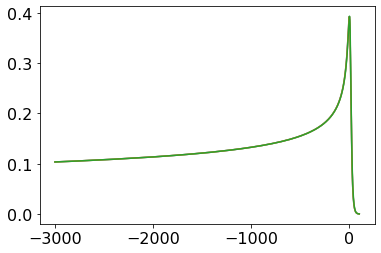

In [22]:
plt.figure()
plt.plot(nrstrain_q1_res2.times, nrstrain_q1_res2.amp)
plt.plot(nrstrain_q1_res3.times, nrstrain_q1_res3.amp)
plt.plot(nrstrain_q1_res4.times, nrstrain_q1_res4.amp)
# plt.xlim(-100,100)

In [23]:
params = lalutils.gen_td_wf_params(
    m1=20, m2=20, approximant=lalsim.SEOBNRv4PHM, f_min=12
)

In [24]:
params

{'m1': 20,
 'm2': 20,
 's1x': 0,
 's1y': 0,
 's1z': 0,
 's2x': 0,
 's2y': 0,
 's2z': 0,
 'distance': 1,
 'inclination': 0,
 'phiRef': 0,
 'longAscNodes': 0,
 'eccentricity': 0,
 'meanPerAno': 0,
 'deltaT': 0.000244140625,
 'f_min': 12,
 'f_ref': 30,
 'params': None,
 'approximant': 52}

In [25]:
times, amp, phase = lalutils.gen_td_wf(params, t_min=-2000, t_max=100)

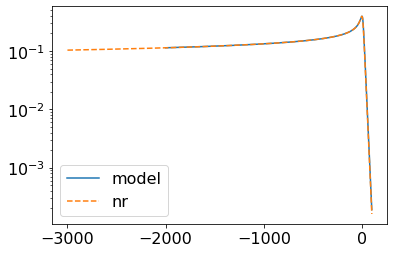

In [26]:
plt.figure()
plt.plot(
    times,
    amp
    / lalutils.td_amp_scale(40, 1)
    / lal.SpinWeightedSphericalHarmonic(0, 0, -2, 2, 2).real,
    label="model",
)
plt.plot(nrstrain_q1_res2.times, nrstrain_q1_res2.amp, ls="--", label="nr")
plt.legend()
plt.yscale("log")
# plt.xlim(-100,100)

In [27]:
plt.figure()
plt.plot(times, phase, label="model")
plt.plot(nrstrain_q1_res2.times, nrstrain_q1_res2.phase, ls="--", label="nr")
plt.legend()
# plt.xlim(-100,100)

# using generator

In [32]:
def plot_comparison(wgs):

    default_cycler = cycler(color=default_cycle_colors[:4]) + cycler(linestyle=["-", "--", "-.", ":"])
    plt.rc("axes", prop_cycle=default_cycler)

    titles = ["amp", "phase", "freq"]

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    for wg in wgs:
        label = wg.label
        axes[0].plot(wg.times, wg.amp, label=label)
        axes[1].plot(wg.times, wg.phase, label=label)
        axes[2].plot(wg.times, wg.freq, label=label)
    axes[0].legend()
    for i, ax in enumerate(axes):
        ax.set_title(titles[i])

    fig.text(0.5, 0.04, "time/M", ha="center")

    plt.show()
    plt.close()

In [56]:
from scipy.integrate import quad
from scipy.optimize import minimize
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

def dephasing(z, i1, i2, win1, win2):
    dt, dphi = z
    return quad(lambda t: np.abs((i1(t)-i2(t+dt)+dphi)),win1,win2)[0]

In [100]:
def plot_raw_difference(wgs):

    default_cycler = cycler(color=default_cycle_colors[:4]) + cycler(linestyle=["-", "--", "-.", ":"])
    plt.rc("axes", prop_cycle=default_cycler)

    titles = ["amp", "phase", "freq"]
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    for wg in wgs[1:]:
        label = f"{wgs[0].label} - {wg.label}"
        axes[0].plot(wg.times, wgs[0].amp - wg.amp, label=label)
        axes[1].plot(wg.times, wgs[0].phase - wg.phase, label=label)
        axes[2].plot(wg.times, wgs[0].freq - wg.freq, label=label)
    axes[0].legend()
    for i, ax in enumerate(axes):
        ax.set_title(titles[i])

    fig.text(0.5, 0.04, "time/M", ha="center")

    plt.show()
    plt.close()

In [120]:
# wg = utils.WaveformGeneration(nrfile=nrfiles_single_res["q18"])
# wg1 = utils.WaveformGeneration(approximant=lalsim.SEOBNRv4, q=18)
# wg2 = utils.WaveformGeneration(approximant=lalsim.IMRPhenomD, q=18)

wg = utils.WaveformGeneration(nrfile=nrfiles_single_res["q4"])
wg1 = utils.WaveformGeneration(approximant=lalsim.SEOBNRv4, q=4)
wg2 = utils.WaveformGeneration(approximant=lalsim.IMRPhenomD, q=4)

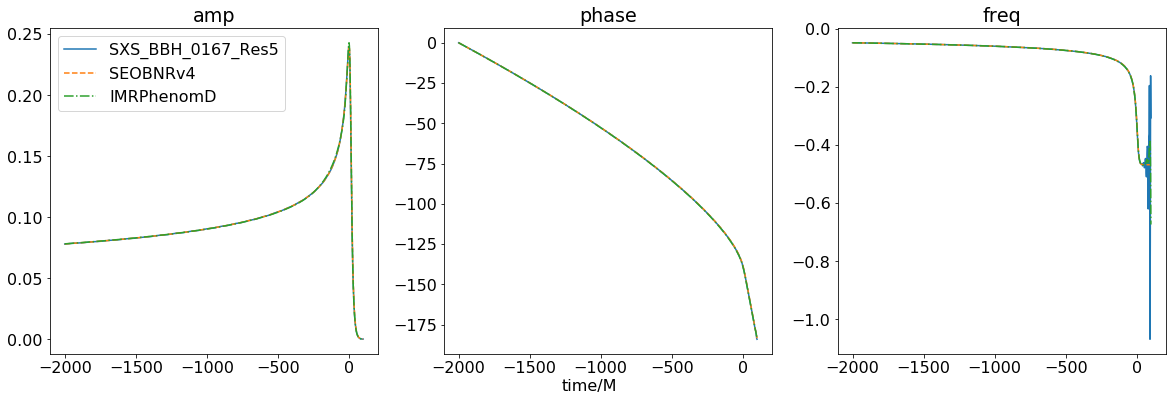

In [121]:
plot_comparison([wg, wg1, wg2])

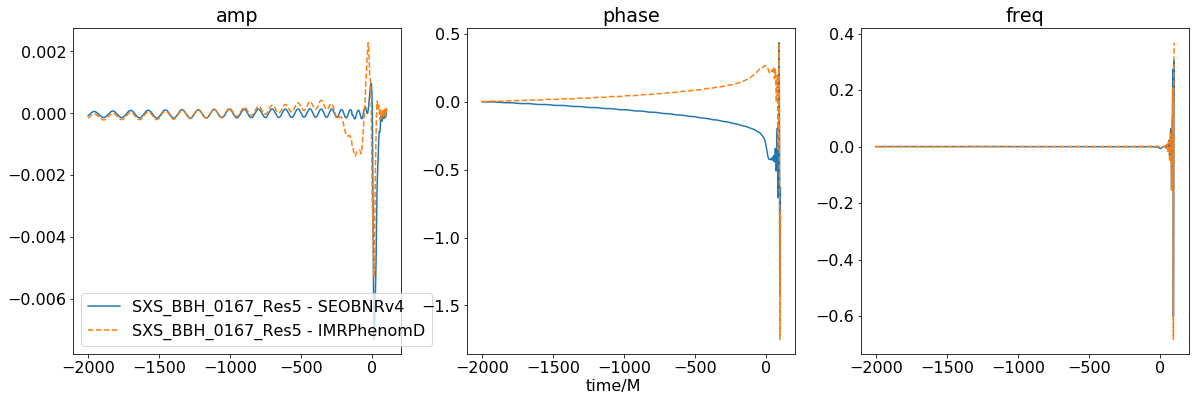

In [122]:
plot_raw_difference([wg, wg1, wg2])

In [134]:
def compute_phase_diff(times1, phase1, times2, phase2, win1, win2, x0=[0.,0.], return_x=False):
    i1 = IUS(times1, phase1)
    i2 = IUS(times2, phase2)
    args = (i1, i2, win1, win2)
    mini = minimize(dephasing, x0, args=args, tol=1e-12).x
    dt = mini[0]
    dphi = mini[1]
    
    i2new = IUS(times2 + dt, phase2 - dphi)
    newphase = i2new(times1)
    print("not sure if subtracting off the zero phase is correct. check this!")
    newphase -= newphase[0]
    if return_x:
        return newphase, [dt, dphi]
    else:
        return newphase

In [135]:
newphase = compute_phase_diff(wg.times, wg.phase, wg1.times, wg1.phase, win1=-2000, win2=-1000)

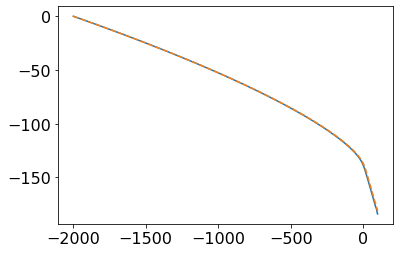

In [136]:
plt.figure()
plt.plot(wg.times, wg.phase)
plt.plot(wg.times, newphase)

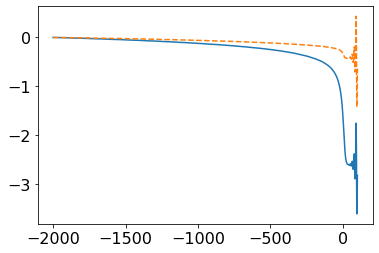

In [137]:
plt.figure()
plt.plot(wg.times, wg.phase-newphase)
plt.plot(wg.times, wg.phase-wg1.phase)

In [138]:
def plot_aligned_difference(wgs, win1=-2000, win2=-1000):

    default_cycler = cycler(color=default_cycle_colors[:4]) + cycler(linestyle=["-", "--", "-.", ":"])
    plt.rc("axes", prop_cycle=default_cycler)

    titles = ["amp", "phase", "freq"]
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    for wg in wgs[1:]:
        label = f"{wgs[0].label} - {wg.label}"
        
        newphase, [dt, _] = compute_phase_diff(wgs[0].times, wgs[0].phase, wg.times, wg.phase, win1=win1, win2=win2, return_x=True)
        newamp = IUS(wg.times + dt, wg.amp)(wgs[0].times)
        newfreq = IUS(wg.times + dt, wg.freq)(wgs[0].times)
        
        axes[0].plot(wgs[0].times, wgs[0].amp - newamp, label=label)
        axes[1].plot(wgs[0].times, wgs[0].phase - newphase, label=label)
        axes[2].plot(wgs[0].times, wgs[0].freq - newfreq, label=label)
    axes[0].legend()
    for i, ax in enumerate(axes):
        ax.set_title(titles[i])

    fig.text(0.5, 0.04, "time/M", ha="center")

    
    axes[2].set_ylim(-0.1,0.1)
        
    plt.show()
    plt.close()

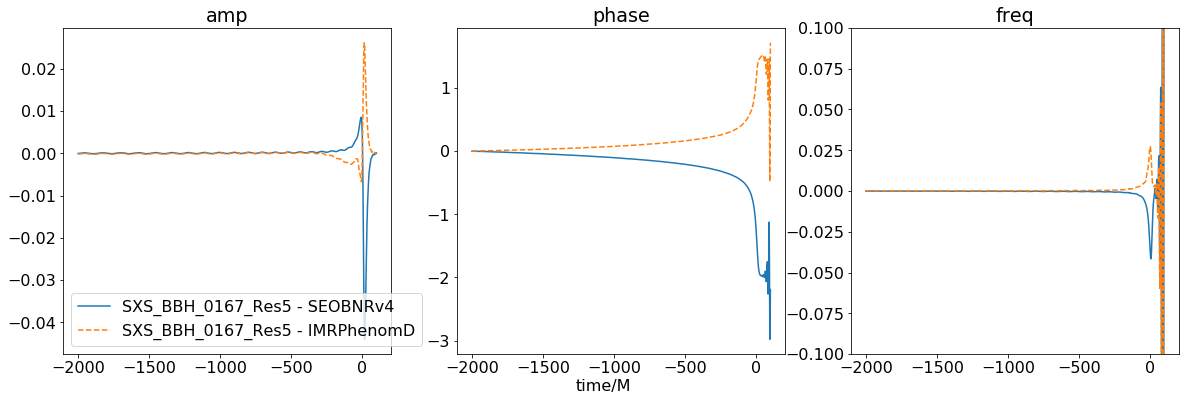

In [140]:
plot_aligned_difference([wg, wg1, wg2], win1=-2000, win2=-1000)

# compare NR resolutions and models

In [143]:
def run_comparison(q):
    wgs = []
    for k, v in nrfiles[f"q{q}"].items():
        wg = utils.WaveformGeneration(nrfile=v)
        wgs.append(wg)

    wgs.append(utils.WaveformGeneration(approximant=lalsim.SEOBNRv4, q=q))
    wgs.append(utils.WaveformGeneration(approximant=lalsim.IMRPhenomD, q=q))
    
#     plot_comparison(wgs)
#     plot_raw_difference(wgs)
    plot_aligned_difference(wgs)

working: q1


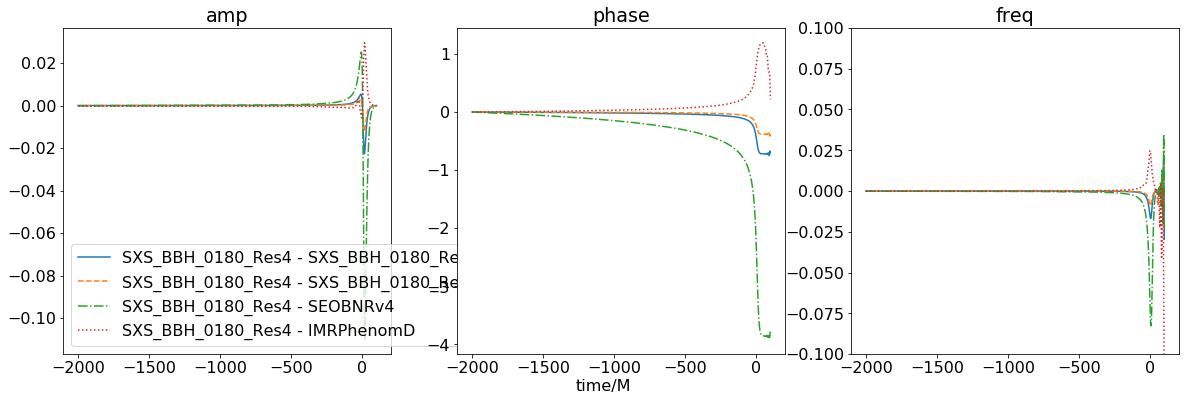

working: q2


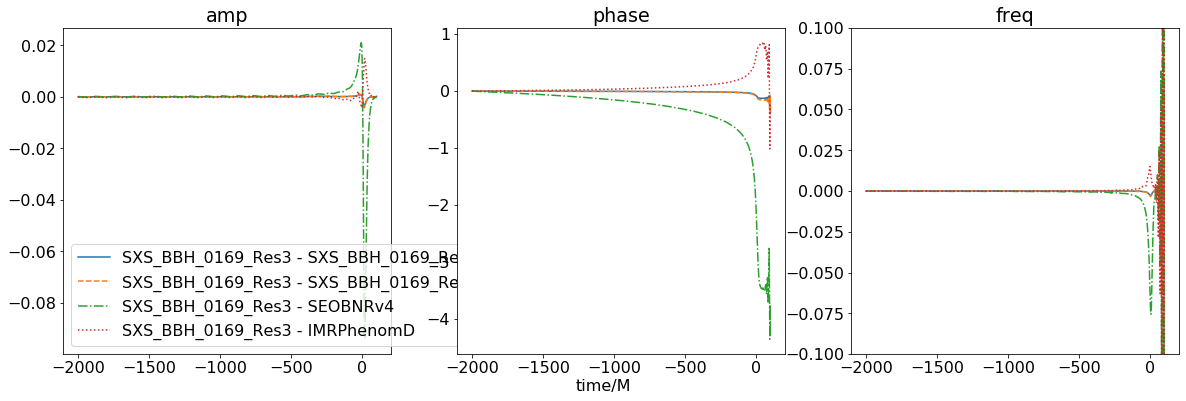

working: q4


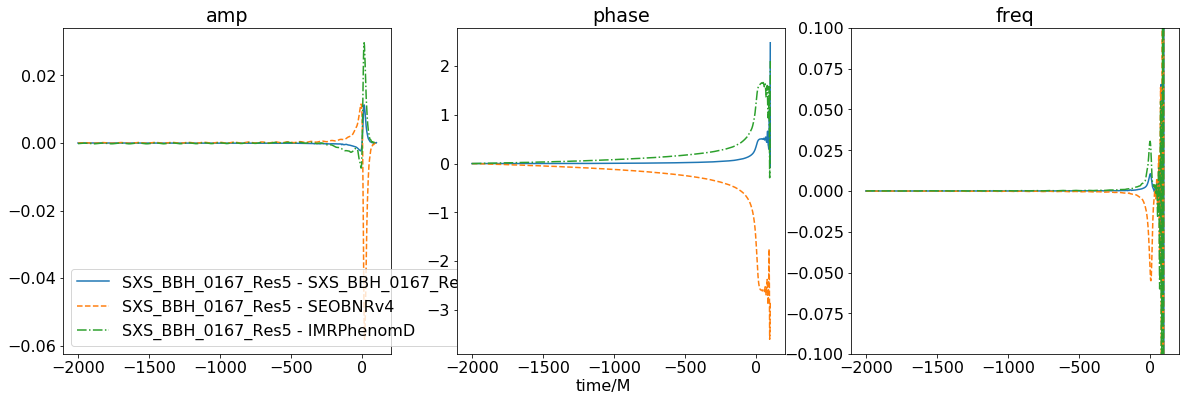

working: q5


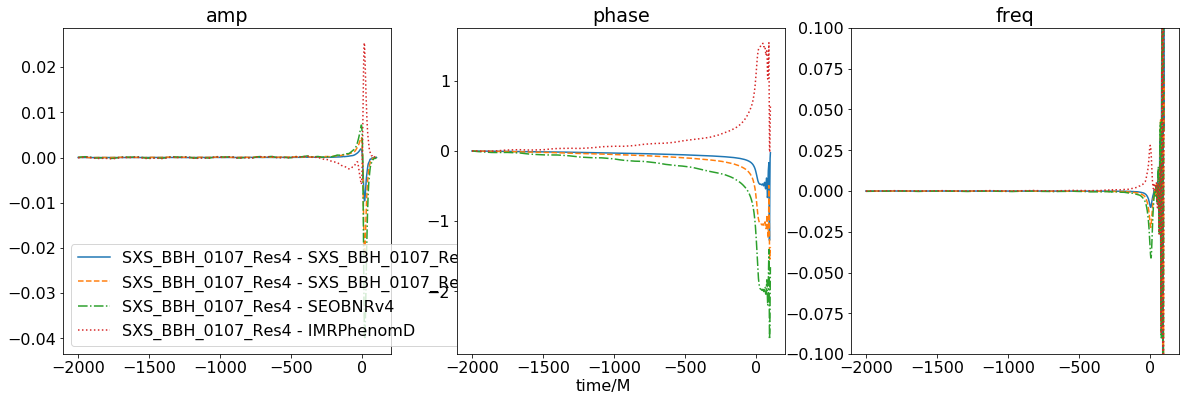

working: q10


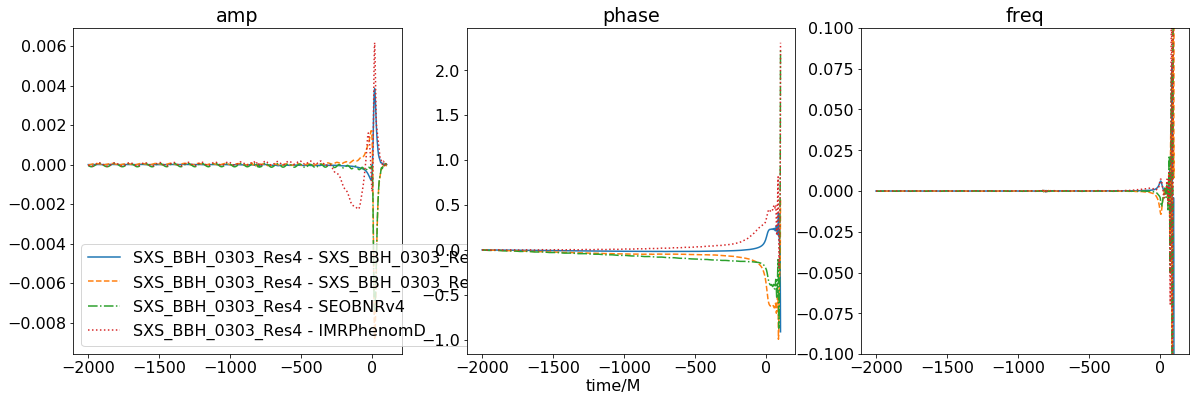

In [144]:
for k in nrfiles.keys():
    print(f"working: {k}")
    run_comparison(q=int(k.split("q")[1]))